<a href="https://colab.research.google.com/github/sundeepkumar/StarWarsGame-master/blob/master/Project_review_with_tutor_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Problem Statement
# Amazon is an online shopping website that now caters to millions of people everywhere.
# Over 34,000 consumer reviews for Amazon brand products like Kindle, Fire TV Stick and more are provided.
# The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment.
# Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral".
# For a given unseen data, the sentiment needs to be predicted.

# You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.

In [ ]:
# Importing all the required libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

import re
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score, recall_score, roc_curve, roc_auc_score, auc
from sklearn import svm
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from sklearn.preprocessing import label_binarize
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Dropout,GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
# Using TensorFlow backend.

In [ ]:
# 1. Perform an EDA on the dataset.
    # a.See what a positive, negative, and neutral review looks like
    # b.Check the class count for each class. It’s a class imbalance problem.
# 2. Convert the reviews in Tf-Idf score.
# 3. Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance

In [ ]:
train=pd.read_csv("train_data_ecommerce.csv")
train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [ ]:
test=pd.read_csv("test_data_ecommerce.csv")
test.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [ ]:
test_val=pd.read_csv("test_data_hidden_ecommerce.csv")
test_val.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [ ]:
# Exploratory Analysis
print('train info:', train.info())
print('test info:', test.info())
print('test_hidden info:', test_val.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4000 non-null   object
 1   brand              4000 non-null   object
 2   categories         4000 non-null   object
 3   primaryCategories  4000 non-null   object
 4   reviews.date       4000 non-null   object
 5   reviews.text       4000 non-null   object
 6   reviews.title      3990 non-null   object
 7   sentiment          4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB
train info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1

In [ ]:
train.duplicated().sum(), test.duplicated().sum(), test_val.duplicated().sum()

(58, 3, 3)

In [ ]:
train = train[train.duplicated()==False]
train.shape

(3942, 8)

In [ ]:
test = test[test.duplicated()==False]
test.shape

(997, 7)

In [ ]:
test_val = test_val[test_val.duplicated()==False]
test_val.shape

(997, 8)

In [ ]:
merge=train.append(test_val,ignore_index=True)
merge.describe()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
count,4939,4939,4939,4939,4939,4939,4926,4939
unique,23,1,23,4,679,4385,3124,3
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,This was a Christmas present. The person that ...,Great tablet,Positive
freq,845,4939,797,3235,124,4,121,4628


In [ ]:
# Look at different reviews
pd.set_option('display.max_colwidth',200)

In [ ]:
merge[merge.sentiment=='Positive'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
0,Purchased on Black FridayPros - Great Price (e...,Powerful tablet
1,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME
3,"very good product. Exactly what I wanted, and ...",Greattttttt
4,This is the 3rd one I've purchased. I've bough...,Very durable!
5,This is a great product. Light weight. I wish ...,You will love it
7,Purchased this for my son. Has room to upgrade...,Great for kids or smaller needs
8,Bought this for my mom and it was just what sh...,Great tablet
10,"I got this tablet to replace my sons old one, ...",Great Tablet
11,Great product for the kids gaming apps parenta...,Works great
12,Love the choice of colors. Have two kindles of...,great pad for both children and adults


In [ ]:
merge[merge.sentiment=='Negative'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
9,"was cheap, can not run chrome stuff, returned ...","was cheap, can not run chrome stuff, returned"
97,"Worthless, except as a regular echo and a poor...",Useless screen so why pay for it?
104,Too bad Amazon turned this tablet into a big a...,Amazon Fire 7 Tablet
121,I bought this Kindle for my 7 year old grand-d...,Kid's Kindle
150,I am reading positive reviews and wish I could...,Have never purchased a more frustrating Device
151,I have to say it was a little confusing and fr...,not big fan
249,It's a good device for children because they d...,Good for kids
267,the speaker voice quality is terrible compare ...,"terrible product,bad voice quality"
368,Needs to be a stand alone device. I should hav...,Needs to be a stand alone device
530,Has a very good Bluetooth speakers sound quali...,Good Bluetooth speaker


In [ ]:
merge[merge.sentiment=='Neutral'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
2,Just an average Alexa option. Does show a few ...,Average
6,My 7-year old daughter saved up to by this. He...,OK For Entry Level Tablet
17,"Not as good as before the old kindle, just sea...",Not as good as before
59,There is nothing spectacular about this item b...,"Does what it says, missing one key feature"
95,It's unfair for me to rate this product cause ...,Haven't set it up yet
114,I bought this as s present for my 65 year old ...,Solid tablet
146,Bought this tablet for 8 year old. It holding ...,Fire tablet
147,bought a few kindles in the past but this time...,Came defective
148,"Not a substitute for an iPad, but a really goo...",Good Reader
187,This device is a good if you are looking for a...,Good for 4 year old


In [ ]:
pd.DataFrame(merge.groupby('sentiment')['reviews.text'].value_counts())

reviews.text
sentiment reviews.text                                                    
Negative  Bought this mostly as a backup.and to read a fe...             4
          The last 2 models of Kindle HDX 8 have been ter...             3
          Difficult to purchase. No stock in 6 stores, no...             2
          Hard to use, Lots of ads, and Randomly closes apps             2
          I can't update Facebook and a few other apps. I...             2
...                                                                    ...
Positive  works great for my 2 year old. I don't like tha...             1
          works great for us for video calling, for kids ...             1
          works like a dream.use it daily.phone feature i...             1
          works well worth the price good quality product...             1
          would get another, works great, having fun with...             1

[4385 rows x 1 columns]

In [ ]:
# class counts
train.sentiment.value_counts()

Positive    3694
Neutral      158
Negative      90
Name: sentiment, dtype: int64

In [ ]:
test_val.sentiment.value_counts()

Positive    934
Neutral      39
Negative     24
Name: sentiment, dtype: int64

In [ ]:
# Data Cleaning
del train['brand']
del test_val['brand']
del test['brand']

train['reviews.date'] = train['reviews.date'].str.split('T').str[0]
test_val['reviews.date'] = test_val['reviews.date'].str.split('T').str[0]
test['reviews.date'] = test['reviews.date'].str.split('T').str[0]

train['reviews_day'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.day
train['reviews_month'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.month
train['reviews_year'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.year

test_val['reviews_day'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.day
test_val['reviews_month'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.month
test_val['reviews_year'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.year

test['reviews_day'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.day
test['reviews_month'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.month
test['reviews_year'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.year

del train['reviews.date']
del test['reviews.date']
del test_val['reviews.date']

train.head()

,name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,26,12,2016
1,Amazon - Echo Plus w/ Built-In Hub - Silver,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,17,1,2018
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",Just an average Alexa option. Does show a few ...,Average,Neutral,20,12,2017
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...","eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","very good product. Exactly what I wanted, and ...",Greattttttt,Positive,4,8,2017
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...","Computers/Tablets & Networking,Tablets & eBook...",Electronics,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,23,1,2017


In [ ]:
name = list(set(list(train['name'])+list(test_val['name'])))
categories = list( set( list( train['categories']) + list(test_val['categories'])))
primaryCategories = list(train['primaryCategories'].unique())

le_name = LabelEncoder()
le_cat = LabelEncoder()
le_pri = LabelEncoder()
le_name.fit(name)
le_cat.fit(categories)
le_pri.fit(primaryCategories)

train['name'] = le_name.transform(train.name)
train['categories'] = le_cat.transform(train.categories)
train['primaryCategories'] = le_pri.transform(train.primaryCategories)
test_val['name'] = le_name.transform(test_val.name)
test_val['categories'] = le_cat.transform(test_val.categories)
test_val['primaryCategories'] = le_pri.transform(test_val.primaryCategories)
test['name'] = le_name.transform(test.name)
test['categories'] = le_cat.transform(test.categories)
test['primaryCategories'] = le_pri.transform(test.primaryCategories)

In [ ]:
train['reviews.title'].fillna(value=' ',inplace=True)
test['reviews.title'].fillna(value=' ',inplace=True)
test_val['reviews.title'].fillna(value=' ',inplace=True)

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
tok = WordPunctTokenizer()
ps = PorterStemmer()
wnl = WordNetLemmatizer()
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
def data_cleaner(text):
    text = text.replace(r"Äú",'')
    text = text.replace(r'Äù','')
    text = text.replace(r'‚Äô','\'')
    text = text.lower()
    text = text.replace(r'‚Äô','\'')
    text = neg_pattern.sub(lambda x: negations_dic[x.group()], text)
    text = re.sub("[^a-zA-Z0-9\"]", " ", text)
    word_tok=[x for x in tok.tokenize(text) if len(x) > 3]
#     word_stem = [ps.stem(i) for i in word_tok]
#     return (" ".join(word_stem).strip())  
    word_lem = [wnl.lemmatize(i) for i in word_tok]
    return (" ".join(word_lem).strip()) 
for i in (train,test_val,test):
    i['reviews.text']=i['reviews.text'].apply(data_cleaner)
    i['reviews.title']=i['reviews.title'].apply(data_cleaner)

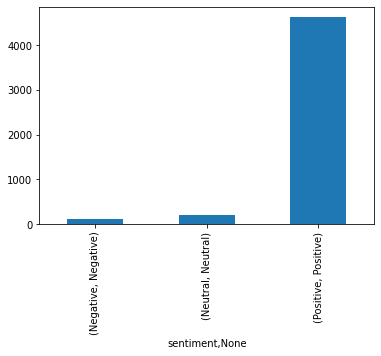

In [ ]:
# Visualization
merge.groupby('sentiment')['sentiment'].apply(lambda x: x.value_counts()).plot(kind='bar')

In [ ]:
merge['token_length'] = [len(x.split(" ")) for x in merge['reviews.text']]
max(merge.token_length)

1539

In [ ]:
pos_text = ' '.join([str(text) for text in merge['reviews.text'][merge['sentiment']=='Positive']])
neg_text = ' '.join([str(text) for text in merge['reviews.text'][merge['sentiment']=='Negative']])
neu_text = ' '.join([str(text) for text in merge['reviews.text'][merge['sentiment']=='Neutral']])

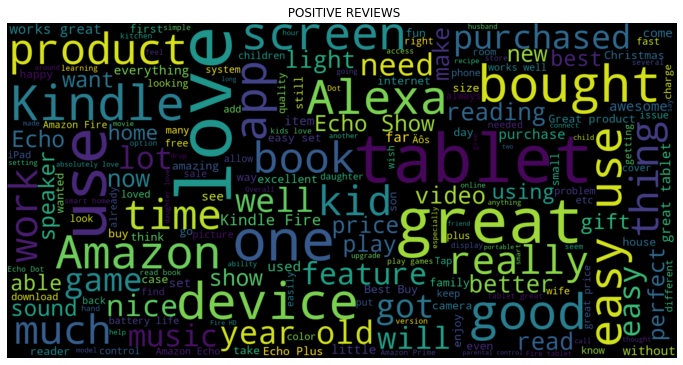

In [ ]:
wordcloud = WordCloud(width=1600, height=800, random_state=15, max_font_size=180).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' POSITIVE REVIEWS')
plt.show()

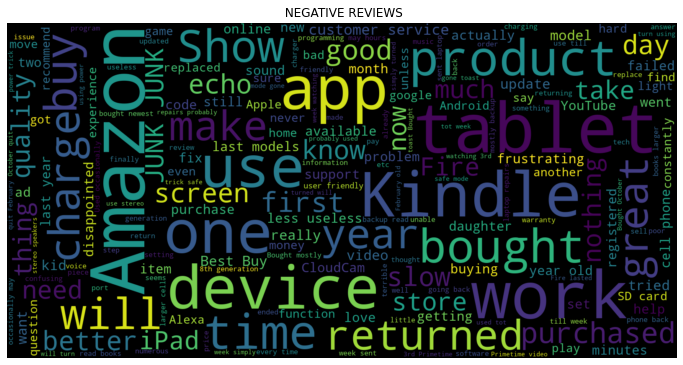

In [ ]:
wordcloud = WordCloud(height=800, width=1600, random_state=15,max_font_size=180).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' NEGATIVE REVIEWS')
plt.show()

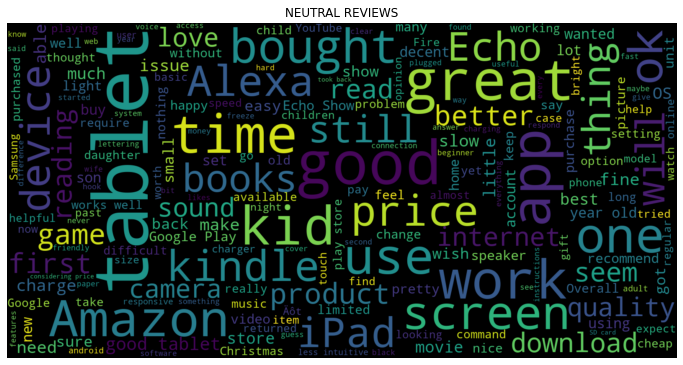

In [ ]:
wordcloud = WordCloud(height=800, width=1600, random_state=15,max_font_size=180).generate(neu_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('NEUTRAL REVIEWS')
plt.show()

In [ ]:
# Convert reviews to Tf-idf score
senti = LabelEncoder()
train['sentiment'] = senti.fit_transform(train['sentiment'])
test_val['sentiment'] = senti.fit_transform(test_val['sentiment'])

In [ ]:
tvec1 = TfidfVectorizer()
tvec2 = TfidfVectorizer()
#tvec3 = TfidfVectorizer()

In [ ]:
train1 = train.reset_index()
combi1 = train1.append(test_val,ignore_index=True,sort=False)
tvec1.fit(combi1['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train1['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())
tvec2.fit(combi1['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train1['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())
Train1 = pd.concat([train1.drop(['reviews.text','reviews.title','sentiment','index'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val1 = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train1=Train1.values
y_train1=train['sentiment'].values
x_val1=Test_Val1.values
x_val1=x_val1[~(np.isnan(x_val1))]
x_val1=np.reshape(x_val1,(997, 5538))
y_val1 = test_val['sentiment'].values

In [ ]:
x_val1.shape

(997, 5538)

In [ ]:
# Multinomial NaiveBayes Classifier
nb = MultinomialNB()
nb.fit(x_train1,y_train1)
y_pred = nb.predict(x_val1)
#print(nb.predict(x_val1))
y_val1 = test_val['sentiment'].values
print(confusion_matrix(y_true=y_val1, y_pred=y_pred))
print(classification_report(y_true=y_val1, y_pred=y_pred))
print(accuracy_score(y_val1, y_pred)*100)

[[  5  10   9]
 [  9  21   9]
 [129 434 371]]
              precision    recall  f1-score   support

           0       0.03      0.21      0.06        24
           1       0.05      0.54      0.08        39
           2       0.95      0.40      0.56       934

    accuracy                           0.40       997
   macro avg       0.34      0.38      0.23       997
weighted avg       0.90      0.40      0.53       997

39.81945837512538


In [ ]:
# The above results shows the model predicts everything as positive. The reason behind this prediction is the data is currently extremely imbalanced.

# Now in order to tackle the data imbalance trying out over and under sampling

In [ ]:
# 1. Tackling Class Imbalance Problem:
# 2. Oversampling or undersampling can be used to tackle the class imbalance problem.
# 3. In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve.
# Use F1-Score as the evaluation criteria for this project.
# 4. Use Tree-based classifiers like Random Forest and XGBoost.
# Note: Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.

In [ ]:
train.sentiment.value_counts()

2    3694
1     158
0      90
Name: sentiment, dtype: int64

In [ ]:
count_2, count_1, count_0 =train.sentiment.value_counts()
class_2 = train[train.sentiment==2]
class_1 = train[train.sentiment==1]
class_0 = train[train.sentiment==0]

In [ ]:
# Oversampling

In [ ]:
class_0_over = class_0.sample(count_2,replace=True)
class_1_over = class_1.sample(count_2,replace=True)
train_over = pd.concat([class_2,class_0_over,class_1_over],axis=0)
print(train_over.shape)
print(train_over.sentiment.value_counts())

(11082, 9)
2    3694
1    3694
0    3694
Name: sentiment, dtype: int64


In [ ]:
# TFIDF Vectorizer for over-sampled data

In [ ]:
train = train_over.reset_index(drop=True) 
merge = train.append(test_val , ignore_index=True)
print(merge.shape)

tvec1.fit(train['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(train['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)

#Train.to_csv('Train.csv',encoding='utf-8')
#Test_Val.to_csv('Test_Val.csv',encoding='utf-8')

x_train_over=Train.values
y_train_over=train['sentiment'].values
x_val_over=Test_Val.values
x_val_over=x_val_over[~(np.isnan(x_val_over))]
x_val_over=np.reshape(x_val_over,(997, 5005))
y_val_over = test_val['sentiment'].values

(12079, 9)


In [ ]:
print(y_val_over.shape)
print(x_val_over.shape)

(997,)
(997, 5005)


Score on training data : 0.931510557661072
Score on testing data : 0.3430290872617854
Classification report for testing data :-
              precision    recall  f1-score   support

           0       0.03      0.79      0.07        24
           1       0.07      0.23      0.11        39
           2       0.98      0.34      0.50       934

    accuracy                           0.34       997
   macro avg       0.36      0.45      0.22       997
weighted avg       0.92      0.34      0.47       997



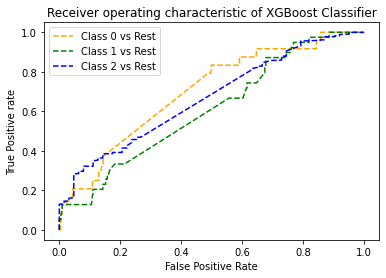

In [ ]:
xgbo = XGBClassifier()
xgbo.fit(x_train_over, y_train_over)
y_pred = xgbo.predict(x_val_over)
y_probs = xgbo.predict_proba(x_val_over)
score_train = xgbo.score(x_train_over,y_train_over)
print("Score on training data :", score_train)
score_test = xgbo.score(x_val_over,y_val_over)
print("Score on testing data :", score_test)
print("Classification report for testing data :-")
print(classification_report(y_val_over, y_pred))
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val_over, y_probs[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Receiver operating characteristic of XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

Score on training data : 1.0
Score on testing data : 0.9438314944834504
Classification report for testing data :-
              precision    recall  f1-score   support

           0       1.00      0.12      0.22        24
           1       1.00      0.10      0.19        39
           2       0.94      1.00      0.97       934

    accuracy                           0.94       997
   macro avg       0.98      0.41      0.46       997
weighted avg       0.95      0.94      0.92       997



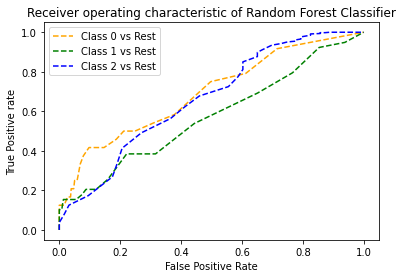

In [ ]:
rfo = RandomForestClassifier()
rfo.fit(x_train_over, y_train_over)
y_pred = rfo.predict(x_val_over)
y_probs = rfo.predict_proba(x_val_over)
score_train = rfo.score(x_train_over,y_train_over)
print("Score on training data :", score_train)
score_test = rfo.score(x_val_over,y_val_over)
print("Score on testing data :", score_test)
print("Classification report for testing data :-")
print(classification_report(y_val_over, y_pred))
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val_over, y_probs[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Receiver operating characteristic of Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
# Undersampling

In [ ]:
class_2_under = class_2.sample(count_1)
train_under= pd.concat([class_2_under,class_1,class_0],axis=0)
print(train_under.shape)
print(train_under.sentiment.value_counts())

(406, 9)
2    158
1    158
0     90
Name: sentiment, dtype: int64


In [ ]:
# TFIDF Vectorizer for under-sampled data

In [ ]:
import nltk

In [ ]:
train = train_under.reset_index(drop=True) 
combi = train.append(test_val , ignore_index=True)
print(combi.shape)

tvec1.fit(combi['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(combi['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

#Train.to_csv('Train.csv',encoding='utf-8')
#Test_Val.to_csv('Test_Val.csv',encoding='utf-8')

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train_under=Train.values
y_train_under=train['sentiment']
x_val_under=Test_Val.values
x_val_under=x_val_under[~(np.isnan(x_val_under))]
x_val_under=np.reshape(x_val_under,(997, len(x_val_under)//997))
y_val_under = test_val['sentiment']

(1403, 9)


In [ ]:
print(y_val_under.shape)
print(x_val_under.shape)

(997,)
(997, 3396)


Score on training data : 0.9408866995073891
Score on testing data : 0.3149448345035105
Classification report for testing data :-
              precision    recall  f1-score   support

           0       0.09      0.17      0.11        24
           1       0.05      0.92      0.10        39
           2       0.98      0.29      0.45       934

    accuracy                           0.31       997
   macro avg       0.37      0.46      0.22       997
weighted avg       0.92      0.31      0.43       997



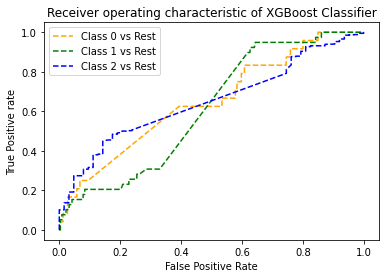

In [ ]:
xgbu = XGBClassifier()
xgbu.fit(x_train_under, y_train_under)
y_pred = xgbu.predict(x_val_under)
y_probs = xgbu.predict_proba(x_val_under)
score_train = xgbu.score(x_train_under,y_train_under)
print("Score on training data :", score_train)
score_test = xgbu.score(x_val_under,y_val_under)
print("Score on testing data :", score_test)
print("Classification report for testing data :-")
print(classification_report(y_val_under, y_pred))
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val_under, y_probs[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Receiver operating characteristic of XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

Score on training data : 1.0
Score on testing data : 0.5015045135406219
Classification report for testing data :-
              precision    recall  f1-score   support

           0       0.60      0.12      0.21        24
           1       0.05      0.64      0.09        39
           2       0.96      0.51      0.66       934

    accuracy                           0.50       997
   macro avg       0.54      0.42      0.32       997
weighted avg       0.91      0.50      0.63       997



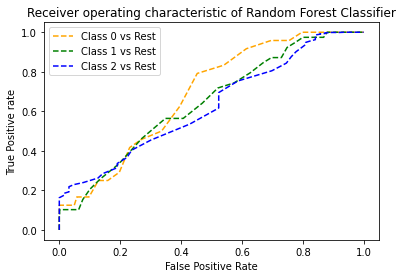

In [ ]:
rfu = RandomForestClassifier()
rfu.fit(x_train_under, y_train_under)
y_pred = rfu.predict(x_val_under)
y_probs = rfu.predict_proba(x_val_under)
score_train = rfu.score(x_train_under,y_train_under)
print("Score on training data :", score_train)
score_test = rfu.score(x_val_under,y_val_under)
print("Score on testing data :", score_test)
print("Classification report for testing data :-")
print(classification_report(y_val_under, y_pred))
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val_under, y_probs[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Receiver operating characteristic of Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [ ]:
# Random forest classifier of oversampled is performing better than other XGB classifier

In [ ]:
# 1. Model Selection:
# 2. Apply multi-class SVM’s and neural nets.
# 3. Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.
# 4. Assign a score to the sentence sentiment (engineer a feature called sentiment score).
# Use this engineered feature in the model and check for improvements. Draw insights on the same.

In [ ]:
# Multi-class SVM

In [1]:
svc = SVC(kernel='linear', C=1, probability=True, class_weight='balanced').fit(x_train_over, y_train_over)
y_pred = svc.predict(x_val_over)
y_probs = svc.predict_proba(x_val_over)
score_train = svc.score(x_train_over,y_train_over)
print("Score on training data :", score_train)
score_test = svc.score(x_val_over,y_val_over)
print("Score on testing data :", score_test)
print("Classification report for testing data :-")
print(classification_report(y_val_over, y_pred))
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val_over, y_probs[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Receiver operating characteristic of multiclass SVM Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

NameError: ignored

In [ ]:
# Neural Network
from sklearn.preprocessing import label_binarize
from sklearn.utils import class_weight

y_train2 = label_binarize(y_train_over, classes=[0, 1, 2])
#y_train2=np.array(train['sentiment'])
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train_over),
                                                 y_train_over)

In [ ]:
#for over-sampled data

classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train_over.shape[1]))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=150,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train_over,y_train2,batch_size=256,epochs=100,verbose=0)
y_pred = classifier.predict(x_val_over, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val_over, y_pred_bool))
print(classification_report(y_val_over, y_pred_bool))

In [ ]:
y_train2

In [ ]:
import numpy as np
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train2),y_train2)
  

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

NameError: ignored

In [ ]:
# Using Class-Weights
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train_over.shape[1]))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train_over,y_train2,batch_size=256,epochs=100,class_weight=class_weights,verbose=0)
y_pred = classifier.predict(x_val_over, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
#class_weights = class_weight.compute_class_weight('balanced',
#                                                 np.unique(y_train),
#                                                 y_train)
model.fit(X_train, y_train, class_weight=class_weights)
print(confusion_matrix(y_val_over, y_pred_bool))
print(classification_report(y_val_over, y_pred_bool))

ValueError: ignored

search to solve error
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
# using dropouts
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train_over.shape[1]))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train_over,y_train2,batch_size=256,epochs=100,class_weight=class_weights,verbose=0)
y_pred = classifier.predict(x_val_over, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val_over, y_pred_bool))
print(classification_report(y_val_over, y_pred_bool))

ValueError: Data cardinality is ambiguous:
  x sizes: 11082
  y sizes: 406
Make sure all arrays contain the same number of samples.

In [ ]:
# ensemble technique using Voting Classifier: XGboost + oversampled_multinomial_NB
from sklearn.ensemble import VotingClassifier
model1 = MultinomialNB()
model2 =  XGBClassifier(n_estimators=1000,max_depth=6)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train_over,y_train_over)
y_pred = model.predict(x_val_over)
print(confusion_matrix(y_true=y_val_over, y_pred=y_pred))
print(classification_report(y_true=y_val_over, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val_over, y_pred)*100)

In [ ]:
# ensemble technique using Voting Classifier: XGboost + oversampled_Random_Forest_Classifier
from sklearn.ensemble import VotingClassifier
model1 = RandomForestClassifier()
model2 =  XGBClassifier(n_estimators=1000,max_depth=6)
model = VotingClassifier(estimators=[('rf', model1), ('xgb', model2)], voting='hard')
model.fit(x_train_over,y_train_over)
y_pred = model.predict(x_val_over)
print(confusion_matrix(y_true=y_val_over, y_pred=y_pred))
print(classification_report(y_true=y_val_over, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val_over, y_pred)*100)

In [ ]:
# XGboost + oversampled_Random_Forest_Classifier has better performance than XGboost + oversampled_multinomial_NB

In [ ]:
!pip install textblob

     |████████████████████████████████| 636 kB 681 kB/s eta 0:00:01


In [ ]:
# Sentiment Score
from textblob import TextBlob
def senti(x):
    return abs(TextBlob(x).sentiment[1])

train['senti_score'] = train['reviews.text'].apply(senti)
test_val['senti_score'] = test_val['reviews.text'].apply(senti)

train.senti_score.head()

0    0.4375
1    0.5750
2    0.5500
3    0.7000
4    0.0000
Name: senti_score, dtype: float64

In [ ]:
Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train=Train.values
y_train=train['sentiment']
x_val=Test_Val.values
x_val=x_val[~(np.isnan(x_val))]
x_val=np.reshape(x_val,(997, 3384))
y_val = test_val['sentiment']

In [ ]:
print(y_val.shape)
print(x_val.shape)

(997,)
(997, 3384)


In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = RandomForestClassifier()
model2 =  XGBClassifier(n_estimators=1000,max_depth=6)
model = VotingClassifier(estimators=[('rf', model1), ('xgb', model2)], voting='hard')
model.fit(x_train,y_train)
y_pred = model.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

/home/sundeep/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:03:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[  5  17   2]
 [  2  36   1]
 [ 53 653 228]]
              precision    recall  f1-score   support

           0       0.08      0.21      0.12        24
           1       0.05      0.92      0.10        39
           2       0.99      0.24      0.39       934

    accuracy                           0.27       997
   macro avg       0.37      0.46      0.20       997
weighted avg       0.93      0.27      0.37       997

accuracy :  26.980942828485453


In [ ]:
# Sentiment Score does not have much affect on the performance

In [ ]:
# 1. Applying LSTM:
# 2. Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.)
# Hint: Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well.
# 3. Compare the accuracy of neural nets with traditional ML based algorithms.
# 4. Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral.
# Hint: Use techniques like Grid Search, Cross-Validation and Random Search

In [ ]:
# LSTM
# for over_sampled data
y_train2 = label_binarize(y_train_over, classes=[0, 1, 2])
emb_dim = 128                                                 
epochs = 3
batch_size = 256
model = Sequential()
model.add(Embedding(3000, emb_dim, input_length=x_train_over.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train_over, y_train2, epochs=epochs, batch_size=batch_size)
y_pred = model.predict(x_val_over, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val_over, y_pred_bool))
print(classification_report(y_val_over, y_pred_bool))

Epoch 1/3


In [ ]:
# using clas_weights
y_train2 = label_binarize(y_train_over, classes=[0, 1, 2])
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train1),y_train1)
emb_dim = 128                                                 
epochs = 4
batch_size = 256
model = Sequential()
model.add(Embedding(3000, emb_dim, input_length=x_train_over.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train_over, y_train2, epochs=epochs, batch_size=batch_size,class_weight=class_weights)
y_pred = model.predict(x_val_over, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val_over, y_pred_bool))
print(classification_report(y_val_over, y_pred_bool))

In [ ]:
# GRU
y_train2 = label_binarize(y_train_over, classes=[0, 1, 2])
epochs = 3
emb_dim = 128
batch_size = 256
model = Sequential()
model.add(Embedding(3000, emb_dim, input_length=x_train_over.shape[1]))
#model.add(SpatialDropout1D(0.7))
model.add(GRU(64, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train_over, y_train2, epochs=epochs, batch_size=batch_size)
y_pred = model.predict(x_val_over, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val_over, y_pred_bool))
print(classification_report(y_val_over, y_pred_bool))

In [ ]:
# We can see from above that LSTM and GPU models are not efficient in predicting minor classes.
# ANN is performing quite good in solving class imbalance problem but it cannot beat traditional ML agorithms.